# Instructions

To move forward with the project, you need to create a collection of songs with their audio features - as large as possible!

These are the songs that we will cluster. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. The more songs you have, the more accurate and diverse recommendations you'll be able to give. Although... you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

The process of sending hundreds or thousands of requests can take some time - it's normal if you have to wait a few minutes (or, if you're ambitious, even hours) to get all the data you need.

An idea for collecting as many songs as possible is to start with all the songs of a big, diverse playlist and then go to every artist present in the playlist and grab every song of every album of that artist. The amount of songs you'll be collecting per playlist will grow exponentially!


#### Importing all libraries & spotify authentification

In [1]:
!pip install spotipy

In [2]:
#import lib
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass # to hide the password
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
client_id = getpass.getpass('id?')
client_secret = getpass.getpass('secret?')

id?········
secret?········


In [4]:
# building and saving an API connection.
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

### Creating a collection of songs from different artists

In [5]:
# from this list of artist we are going to extract the top 50 songs in spotify and extract ids and audio features
artists = ["8Ball & MJG", "Three 6 Mafia","Outkast","T.I.", "Youngbloodz", "Devin The Dude", "Baby"
          ,"Clipse", "Goodie Mob", "Young Dro", "Master P", "OJ Da Juiceman", "Gucci Mane", "Lil Wayne",
           "Project Pat", "Bun B", "UGK", "Snoop Dogg", "Juicy J", "Rick Ross", "Drake", "French Montana",
           "Soulja Boy", "Jeezy", "Mike Jones", "Paul Wall", "Slim Thug", "Waka Flocka Flame", "Ludacris", "Styles P", "Ying Yang Twins", "Future", "Redman", "Travis Scott",
           "Meek Mill","Young Thug",
           "Gunna",
           "Moneybagg Yo",
           "Baby Keem",
           "Kendrick Lamar",
           "Da Baby",
           "J. Cole",
           "Kanye West",
           "21 Savage",
           "Tyga",
           "2 Chainz",
           "Big Sean",
           "Kodak Black",
           "Megan Thee Stallion",
           "Jadakiss",
           "JAY-Z"] 
# loop the artist search
#sp.searc pertutti gli artisti nella lista
my_20_artists = [sp.search(q= artist , limit = 50) for artist in artists]
# create the dictionary
#def artist_to_dict(artists):
   # return{artist:sp.search(q= artist , limit = 50) for artist in artists}
#len(artist_to_dict(artists))


### Taking a look at the data that we have

In [6]:
# obtain the names and ids of all the artists
# Each item is a dict in and of itself.
my_20_artists[2]['tracks'].keys() #Each Spotify track is a dictionary with the following keys:

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [7]:
my_20_artists[2]['tracks']['total'] # total reproduction 

1754

In [8]:
# Outkast, track item number 1
# We can get the id, uri, and so on from here.
my_20_artists[2]['tracks']['items'][0] 

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1G9G7WwrXka3Z1r7aIDjI7'},
    'href': 'https://api.spotify.com/v1/artists/1G9G7WwrXka3Z1r7aIDjI7',
    'id': '1G9G7WwrXka3Z1r7aIDjI7',
    'name': 'Outkast',
    'type': 'artist',
    'uri': 'spotify:artist:1G9G7WwrXka3Z1r7aIDjI7'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   '

In [9]:
# song title
my_20_artists[2]['tracks']['items'][0]['name']

'Ms. Jackson'

In [10]:
my_20_artists[2]['tracks']['items'][0]['id']

'0I3q5fE6wg7LIfHGngUTnV'

In [11]:
my_20_artists[2]['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [12]:
# # I discovered one thing, and now I must iterate to obtain all items for each artist.
my_20_artists[2]['tracks']['items']

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1G9G7WwrXka3Z1r7aIDjI7'},
     'href': 'https://api.spotify.com/v1/artists/1G9G7WwrXka3Z1r7aIDjI7',
     'id': '1G9G7WwrXka3Z1r7aIDjI7',
     'name': 'Outkast',
     'type': 'artist',
     'uri': 'spotify:artist:1G9G7WwrXka3Z1r7aIDjI7'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',
    'GH',
    'GM',
    'GN',
    'GQ',
    'GR

In [13]:
#total items 

tot_items = [my_20_artists[i]['tracks']['items'] for i in  range(len(my_20_artists))]

In [14]:
# double indexing for artist and songs
# first artist, first song - Id
tot_items[0][0]['id']

'48F4fY1pKOTWN1H8q99dJE'

### Obtaining all of the ids for each artist and track

In [15]:
# obtain all of the ids
tot_ids = [tot_items[artist][track]['id'] for track in range(0,50) for artist in range(len(my_20_artists))]
len(tot_ids)

2550

In [16]:
tot_ids

['48F4fY1pKOTWN1H8q99dJE',
 '5MYFw4T2gy52pOGBN4EYHS',
 '0I3q5fE6wg7LIfHGngUTnV',
 '1IAzD1muglOxOcPbUHs70R',
 '5TpaWJKnuyA4MjzAbFXSTQ',
 '4FI0rdztOAYJZMupujL5Gp',
 '6epn3r7S14KUqlReYr77hA',
 '0oPOuDmmkVp3h6puekhs6P',
 '5wvxRlpUTSX9CE52yFZsIY',
 '3q8Uyfo98yoEqByamJOIkJ',
 '6PDiL8QLrNj1Bi85vkZTcK',
 '3fGF2eP79xeu2ABvSSfMXl',
 '4EivmOT13NMpNSfTKn9p4s',
 '6pmNoWKk0r6zfIjWneJRxR',
 '2BcMwX1MPV6ZHP4tUT9uq6',
 '0q7LGcVSpsIoSbjChtZ8lI',
 '7m97yKVzPpXV9Z4ezEziOD',
 '503OTo2dSqe7qk76rgsbep',
 '5jrdCoLpJSvHHorevXBATy',
 '5ry2OE6R2zPQFDO85XkgRb',
 '2BcMwX1MPV6ZHP4tUT9uq6',
 '3B54sVLJ402zGa6Xm4YGNe',
 '2q4rjDy9WhaN3o9MvDbO21',
 '5dANgSy7v091dhiPnEXNrf',
 '2QurCbkPO14pjrikPNja0h',
 '59rtiYOPgMEDf3yPEfU2la',
 '00mojm5rDbk8dhvwHw4IIz',
 '03tqyYWC9Um2ZqU0ZN849H',
 '6epn3r7S14KUqlReYr77hA',
 '7cFpB4ozcSwXuhqjvNbrbP',
 '0r2Bul2NuCViraT2zX1l5j',
 '0k1WUmIRnG3xU6fvvDVfRG',
 '5DhHtzRjVTVvRl1eajvYPe',
 '40iJIUlhi6renaREYGeIDS',
 '3J4VKkUpLvomXJbn9ZAypO',
 '4KDNRh9Oor80z3XIxdWlui',
 '4eL3XeuGaEoVT8ttDh3hwY',
 

In [17]:
# Obtain the audio features
sp.audio_features(tot_ids[:10])

[{'danceability': 0.777,
  'energy': 0.871,
  'key': 7,
  'loudness': -5.588,
  'mode': 1,
  'speechiness': 0.236,
  'acousticness': 0.00998,
  'instrumentalness': 0,
  'liveness': 0.366,
  'valence': 0.624,
  'tempo': 140.098,
  'type': 'audio_features',
  'id': '48F4fY1pKOTWN1H8q99dJE',
  'uri': 'spotify:track:48F4fY1pKOTWN1H8q99dJE',
  'track_href': 'https://api.spotify.com/v1/tracks/48F4fY1pKOTWN1H8q99dJE',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/48F4fY1pKOTWN1H8q99dJE',
  'duration_ms': 273973,
  'time_signature': 4},
 {'danceability': 0.789,
  'energy': 0.881,
  'key': 11,
  'loudness': -5.758,
  'mode': 1,
  'speechiness': 0.0331,
  'acousticness': 0.109,
  'instrumentalness': 0,
  'liveness': 0.355,
  'valence': 0.647,
  'tempo': 133.299,
  'type': 'audio_features',
  'id': '5MYFw4T2gy52pOGBN4EYHS',
  'uri': 'spotify:track:5MYFw4T2gy52pOGBN4EYHS',
  'track_href': 'https://api.spotify.com/v1/tracks/5MYFw4T2gy52pOGBN4EYHS',
  'analysis_url': 'https://api.spot

In [18]:
# chunckin the tot ids is required to go beyond Spotipy's restriction of 50 tracks.
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

        
audio_feats = []
for chunk in list(chunks(tot_ids, 50)):
        audio_feats.append(sp.audio_features(chunk))

In [19]:
type(audio_feats)

list

In [20]:
audio_feats

[[{'danceability': 0.777,
   'energy': 0.871,
   'key': 7,
   'loudness': -5.588,
   'mode': 1,
   'speechiness': 0.236,
   'acousticness': 0.00998,
   'instrumentalness': 0,
   'liveness': 0.366,
   'valence': 0.624,
   'tempo': 140.098,
   'type': 'audio_features',
   'id': '48F4fY1pKOTWN1H8q99dJE',
   'uri': 'spotify:track:48F4fY1pKOTWN1H8q99dJE',
   'track_href': 'https://api.spotify.com/v1/tracks/48F4fY1pKOTWN1H8q99dJE',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/48F4fY1pKOTWN1H8q99dJE',
   'duration_ms': 273973,
   'time_signature': 4},
  {'danceability': 0.789,
   'energy': 0.881,
   'key': 11,
   'loudness': -5.758,
   'mode': 1,
   'speechiness': 0.0331,
   'acousticness': 0.109,
   'instrumentalness': 0,
   'liveness': 0.355,
   'valence': 0.647,
   'tempo': 133.299,
   'type': 'audio_features',
   'id': '5MYFw4T2gy52pOGBN4EYHS',
   'uri': 'spotify:track:5MYFw4T2gy52pOGBN4EYHS',
   'track_href': 'https://api.spotify.com/v1/tracks/5MYFw4T2gy52pOGBN4EYHS',
  

In [21]:
# Because some of the values were none, I chose to use'song is not none' instead

chunk_list = [song for artist in audio_feats for song in artist if song is not None]

In [22]:
df = pd.DataFrame(chunk_list)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.777,0.871,7,-5.588,1,0.2360,0.00998,0.000000,0.3660,0.624,140.098,audio_features,48F4fY1pKOTWN1H8q99dJE,spotify:track:48F4fY1pKOTWN1H8q99dJE,https://api.spotify.com/v1/tracks/48F4fY1pKOTW...,https://api.spotify.com/v1/audio-analysis/48F4...,273973,4
1,0.789,0.881,11,-5.758,1,0.0331,0.10900,0.000000,0.3550,0.647,133.299,audio_features,5MYFw4T2gy52pOGBN4EYHS,spotify:track:5MYFw4T2gy52pOGBN4EYHS,https://api.spotify.com/v1/tracks/5MYFw4T2gy52...,https://api.spotify.com/v1/audio-analysis/5MYF...,236600,4
2,0.843,0.806,4,-5.946,0,0.2690,0.14300,0.000000,0.0771,0.613,94.948,audio_features,0I3q5fE6wg7LIfHGngUTnV,spotify:track:0I3q5fE6wg7LIfHGngUTnV,https://api.spotify.com/v1/tracks/0I3q5fE6wg7L...,https://api.spotify.com/v1/audio-analysis/0I3q...,270507,4
3,0.680,0.687,9,-6.162,0,0.0709,0.01610,0.000000,0.2610,0.467,150.053,audio_features,1IAzD1muglOxOcPbUHs70R,spotify:track:1IAzD1muglOxOcPbUHs70R,https://api.spotify.com/v1/tracks/1IAzD1muglOx...,https://api.spotify.com/v1/audio-analysis/1IAz...,249533,4
4,0.772,0.724,6,-5.799,0,0.3070,0.01490,0.000000,0.3550,0.518,84.038,audio_features,5TpaWJKnuyA4MjzAbFXSTQ,spotify:track:5TpaWJKnuyA4MjzAbFXSTQ,https://api.spotify.com/v1/tracks/5TpaWJKnuyA4...,https://api.spotify.com/v1/audio-analysis/5Tpa...,298600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,0.785,0.575,1,-5.628,0,0.1330,0.10500,0.000000,0.1290,0.272,81.529,audio_features,4BGOmYmRw56e8aFncJzDoD,spotify:track:4BGOmYmRw56e8aFncJzDoD,https://api.spotify.com/v1/tracks/4BGOmYmRw56e...,https://api.spotify.com/v1/audio-analysis/4BGO...,222360,4
2545,0.838,0.379,1,-8.451,1,0.4470,0.00189,0.000000,0.1110,0.211,164.038,audio_features,3L8iFFoNLiDLdy09txyVx8,spotify:track:3L8iFFoNLiDLdy09txyVx8,https://api.spotify.com/v1/tracks/3L8iFFoNLiDL...,https://api.spotify.com/v1/audio-analysis/3L8i...,216415,4
2546,0.933,0.526,8,-6.398,1,0.2440,0.00879,0.000039,0.2760,0.833,131.990,audio_features,6LcnvbHMT0qZDKZuUZaqt2,spotify:track:6LcnvbHMT0qZDKZuUZaqt2,https://api.spotify.com/v1/tracks/6LcnvbHMT0qZ...,https://api.spotify.com/v1/audio-analysis/6Lcn...,148484,4
2547,0.619,0.572,8,-6.531,1,0.4650,0.08260,0.000000,0.2430,0.245,116.577,audio_features,7phUrm3QFPpMkF9WGtu198,spotify:track:7phUrm3QFPpMkF9WGtu198,https://api.spotify.com/v1/tracks/7phUrm3QFPpM...,https://api.spotify.com/v1/audio-analysis/7phU...,196334,5


In [23]:
max(df['danceability'])

0.974

In [24]:
df.to_csv('/Users/edudarrelljockers/Desktop/Ironhack/wrapper_lab.csv', index=False)

In [25]:
df.keys()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [26]:
df_num = df._get_numeric_data()
df_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.777,0.871,7,-5.588,1,0.2360,0.00998,0.0,0.3660,0.624,140.098,273973,4
1,0.789,0.881,11,-5.758,1,0.0331,0.10900,0.0,0.3550,0.647,133.299,236600,4
2,0.843,0.806,4,-5.946,0,0.2690,0.14300,0.0,0.0771,0.613,94.948,270507,4
3,0.680,0.687,9,-6.162,0,0.0709,0.01610,0.0,0.2610,0.467,150.053,249533,4
4,0.772,0.724,6,-5.799,0,0.3070,0.01490,0.0,0.3550,0.518,84.038,298600,4


In [27]:
df_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.777,0.871,7,-5.588,1,0.2360,0.00998,0.000000,0.3660,0.624,140.098,273973,4
1,0.789,0.881,11,-5.758,1,0.0331,0.10900,0.000000,0.3550,0.647,133.299,236600,4
2,0.843,0.806,4,-5.946,0,0.2690,0.14300,0.000000,0.0771,0.613,94.948,270507,4
3,0.680,0.687,9,-6.162,0,0.0709,0.01610,0.000000,0.2610,0.467,150.053,249533,4
4,0.772,0.724,6,-5.799,0,0.3070,0.01490,0.000000,0.3550,0.518,84.038,298600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,0.785,0.575,1,-5.628,0,0.1330,0.10500,0.000000,0.1290,0.272,81.529,222360,4
2545,0.838,0.379,1,-8.451,1,0.4470,0.00189,0.000000,0.1110,0.211,164.038,216415,4
2546,0.933,0.526,8,-6.398,1,0.2440,0.00879,0.000039,0.2760,0.833,131.990,148484,4
2547,0.619,0.572,8,-6.531,1,0.4650,0.08260,0.000000,0.2430,0.245,116.577,196334,5


In [28]:
col_names = df_num.columns

In [29]:
from sklearn.preprocessing import StandardScaler
#X_prep = StandardScaler().fit_transform(df_num)

In [30]:
scaler = StandardScaler()
scaler.fit(df_num)
X_prep = scaler.transform(df_num)

In [31]:
X_prep_df = pd.DataFrame(X_prep, columns=col_names)

In [32]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(random_state=1234)

In [33]:
kmeans.cluster_centers_

array([[ 4.09059975e-01,  5.98669513e-01, -1.34581236e-03,
         4.69312339e-01,  8.41691773e-01, -6.39361035e-02,
        -1.20898931e-01, -1.59756755e-01, -3.06902447e-01,
         7.87186293e-01,  7.24591060e-03, -8.50448010e-02,
         8.51238641e-02],
       [-8.22206542e-01,  2.44249614e-01, -4.98332988e-01,
         3.77524269e-01,  6.33385493e-01, -4.03583356e-01,
        -3.64201209e-01, -1.00573474e-01, -1.35891021e-01,
        -7.75059846e-01,  2.76032009e-01,  5.25836952e-01,
        -1.96721123e-03],
       [-6.11994300e-01, -5.50382534e-01,  7.97068715e-02,
        -1.34263398e+00, -2.30642266e-01, -8.96919210e-01,
         3.47483001e-01,  6.46913691e+00, -3.39641748e-01,
        -3.05565558e-01,  2.20117675e-01, -7.29530357e-01,
        -2.84854915e-01],
       [-4.71838830e-01,  4.93538263e-01,  6.28399079e-02,
         3.25883000e-01, -1.19780665e-01,  3.02754410e-01,
        -8.40654761e-02, -1.63300537e-01,  2.20203010e+00,
         8.67540482e-02, -1.82861717e

In [34]:
kmeans.inertia_

21164.34832789264

In [35]:
clusters = kmeans.predict(X_prep)
clusters

array([0, 0, 7, ..., 0, 4, 5], dtype=int32)

In [36]:
pd.Series(clusters).value_counts().sort_index()

0    506
1    419
2     53
3    247
4    465
5    199
6     17
7    643
dtype: int64

In [37]:
X_df = pd.DataFrame(X_prep)
X_df['cluster'] = clusters
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,0.339487,1.421346,0.490239,0.429656,0.841692,0.057090,-0.727163,-0.17049,0.990717,0.544030,0.560133,0.787486,0.055422,0
1,0.423523,1.485830,1.564718,0.365791,0.841692,-1.339869,-0.174678,-0.17049,0.921622,0.645812,0.337376,0.227437,0.055422,0
2,0.801684,1.002202,-0.315620,0.295164,-1.188083,0.284293,0.015026,-0.17049,-0.823971,0.495351,-0.919127,0.735547,0.055422,7
3,-0.339803,0.234846,1.027478,0.214018,-1.188083,-1.079617,-0.693016,-0.17049,0.331173,-0.150746,0.886291,0.421243,0.055422,7
4,0.304472,0.473436,0.221619,0.350389,-1.188083,0.545922,-0.699712,-0.17049,0.921622,0.074945,-1.276573,1.156532,0.055422,7


<AxesSubplot:ylabel='Frequency'>

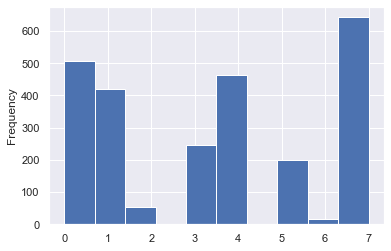

In [38]:
X_df['cluster'].plot(kind='hist')

### Inertia

Running the method numerous times with different random initializations and keeping the best result is one technique to determine the centroids. The n init hyperparameter controls the number of random initializations: by default, it is, which means that the entire algorithm runs 10 times when we use fit(), and Scikit Learn keeps the best answer. The inertia is defined as the average square distance between each instance and its nearest centroid. The KMeans class iteratively runs the procedure n init times and maintains the model with the lowest inertia.

Text(0, 0.5, 'inertia')

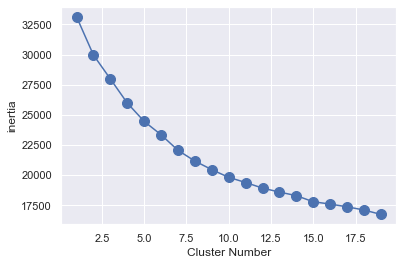

In [39]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=10,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(1,20)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

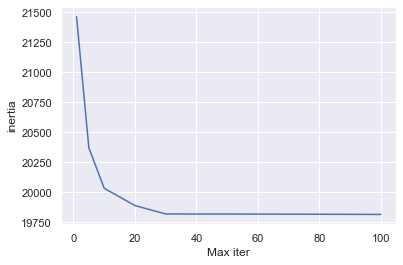

In [40]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=10,
                    random_state=1234,
                    n_init=10,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

### Silhouette coefficient
The silhouette coefficient of an instance is equal to (b-a)/max(a,b), where an is the distance to other instances in the same cluster and b is the mean nearest-cluster distance. The silhouette coefficient can range from -1 to +1. A coefficient near to +1 indicates that the instance is well within its own cluster and distant from other clusters, a coefficient close to 0 indicates that it is close to a cluster border, and a coefficient close to -1 indicates that the distance may have been given to the incorrect cluster.

In [41]:
from sklearn.metrics import silhouette_score

K = range(2, 20)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

Text(0, 0.5, 'silhouette score')

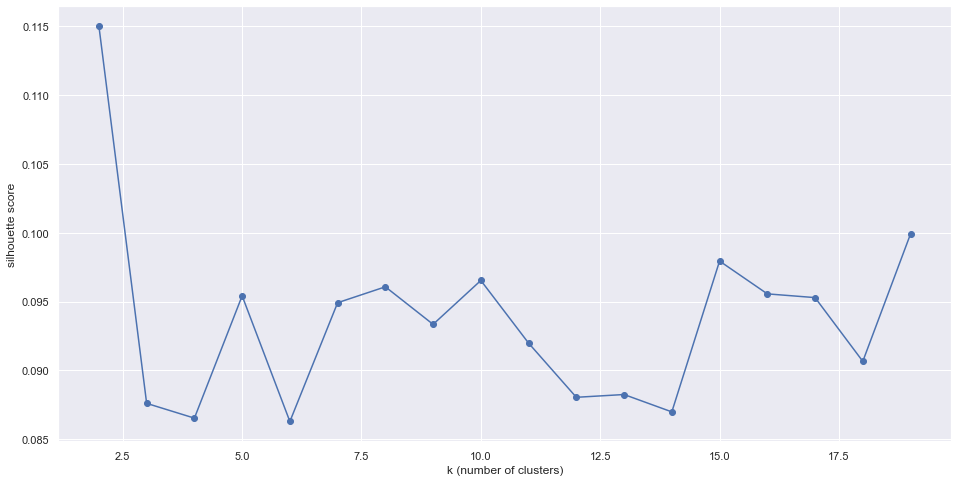

In [42]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

In [43]:
kmeans = KMeans(n_clusters=10,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([7, 7, 1, ..., 7, 8, 2], dtype=int32)

In [44]:
clusters.shape

(2549,)

In [45]:
features_clustered = pd.DataFrame(X_prep, columns=col_names)

In [46]:
features_clustered['cluster_id'] = clusters

In [47]:
features_clustered.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
0,0.339487,1.421346,0.490239,0.429656,0.841692,0.057090,-0.727163,-0.17049,0.990717,0.544030,0.560133,0.787486,0.055422,7
1,0.423523,1.485830,1.564718,0.365791,0.841692,-1.339869,-0.174678,-0.17049,0.921622,0.645812,0.337376,0.227437,0.055422,7
2,0.801684,1.002202,-0.315620,0.295164,-1.188083,0.284293,0.015026,-0.17049,-0.823971,0.495351,-0.919127,0.735547,0.055422,1
3,-0.339803,0.234846,1.027478,0.214018,-1.188083,-1.079617,-0.693016,-0.17049,0.331173,-0.150746,0.886291,0.421243,0.055422,1
4,0.304472,0.473436,0.221619,0.350389,-1.188083,0.545922,-0.699712,-0.17049,0.921622,0.074945,-1.276573,1.156532,0.055422,8


In [48]:
features_clustered['cluster_id'].value_counts()

1    502
7    437
9    355
2    309
4    266
8    260
3    194
0    156
6     53
5     17
Name: cluster_id, dtype: int64

In [49]:
kmeans.cluster_centers_

array([[-0.44031358, -1.11603745,  0.02704207, -1.06116073, -0.34234373,
        -0.11665422,  2.57274033, -0.12902077, -0.16362173, -0.25934518,
        -0.25266555, -0.41821362, -0.06018461],
       [ 0.44603824,  0.20255315,  0.57960046,  0.21021361, -1.18808337,
        -0.27790632, -0.17683645, -0.13927386, -0.26428583,  0.37407786,
         0.07397286,  0.04341398,  0.01350913],
       [ 0.53328143, -1.12662773, -0.04613123, -1.13362008,  0.09941154,
         0.9768579 , -0.15277015, -0.15163119, -0.32119096, -0.21367013,
         0.19696545, -0.39210737,  0.08460481],
       [-0.21963299,  0.3696306 ,  0.11638671,  0.26090417,  0.01513385,
         0.21295937,  0.01907871, -0.16154395,  2.48895382,  0.13077977,
        -0.01371776,  0.08540104,  0.10190363],
       [-0.9525377 ,  0.57871903, -0.3388468 ,  0.50347093,  0.43726289,
         0.13441851, -0.17838433, -0.1304676 , -0.17815632, -0.25214251,
         1.27606321,  0.31814046, -0.11407661],
       [-1.38036407, -0.067468

In [50]:
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=col_names)

In [51]:
cluster_centers_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.440314,-1.116037,0.027042,-1.061161,-0.342344,-0.116654,2.572740,-0.129021,-0.163622,-0.259345,-0.252666,-0.418214,-0.060185
1,0.446038,0.202553,0.579600,0.210214,-1.188083,-0.277906,-0.176836,-0.139274,-0.264286,0.374078,0.073973,0.043414,0.013509
2,0.533281,-1.126628,-0.046131,-1.133620,0.099412,0.976858,-0.152770,-0.151631,-0.321191,-0.213670,0.196965,-0.392107,0.084605
3,-0.219633,0.369631,0.116387,0.260904,0.015134,0.212959,0.019079,-0.161544,2.488954,0.130780,-0.013718,0.085401,0.101904
4,-0.952538,0.578719,-0.338847,0.503471,0.437263,0.134419,-0.178384,-0.130468,-0.178156,-0.252143,1.276063,0.318140,-0.114077
5,-1.380364,-0.067468,-0.078603,-0.947284,0.364098,1.394270,0.722813,0.273718,1.007862,0.099935,-0.881430,-0.242465,-8.961928
6,-0.611994,-0.550383,0.079707,-1.342634,-0.230642,-0.896919,0.347483,6.469137,-0.339642,-0.305566,0.220118,-0.729530,-0.284855
7,0.635712,0.506342,0.051350,0.432282,0.837047,-0.177615,-0.195363,-0.158587,-0.304775,0.791240,-0.036415,-0.071967,0.062301
8,-1.104475,0.741564,-0.010840,0.499490,-0.259071,0.443434,-0.134488,-0.126005,0.035395,0.051321,-1.118780,0.488901,0.471608
9,0.116161,-0.532001,-0.664448,-0.016190,0.584396,-0.662119,-0.371788,-0.119755,-0.149780,-1.082326,-0.240108,0.029684,0.013087


In [52]:
cluster_centers_df['cluster_id'] = range(0,10)

In [53]:
cluster_centers_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster_id
0,-0.440314,-1.116037,0.027042,-1.061161,-0.342344,-0.116654,2.572740,-0.129021,-0.163622,-0.259345,-0.252666,-0.418214,-0.060185,0
1,0.446038,0.202553,0.579600,0.210214,-1.188083,-0.277906,-0.176836,-0.139274,-0.264286,0.374078,0.073973,0.043414,0.013509,1
2,0.533281,-1.126628,-0.046131,-1.133620,0.099412,0.976858,-0.152770,-0.151631,-0.321191,-0.213670,0.196965,-0.392107,0.084605,2
3,-0.219633,0.369631,0.116387,0.260904,0.015134,0.212959,0.019079,-0.161544,2.488954,0.130780,-0.013718,0.085401,0.101904,3
4,-0.952538,0.578719,-0.338847,0.503471,0.437263,0.134419,-0.178384,-0.130468,-0.178156,-0.252143,1.276063,0.318140,-0.114077,4
5,-1.380364,-0.067468,-0.078603,-0.947284,0.364098,1.394270,0.722813,0.273718,1.007862,0.099935,-0.881430,-0.242465,-8.961928,5
6,-0.611994,-0.550383,0.079707,-1.342634,-0.230642,-0.896919,0.347483,6.469137,-0.339642,-0.305566,0.220118,-0.729530,-0.284855,6
7,0.635712,0.506342,0.051350,0.432282,0.837047,-0.177615,-0.195363,-0.158587,-0.304775,0.791240,-0.036415,-0.071967,0.062301,7
8,-1.104475,0.741564,-0.010840,0.499490,-0.259071,0.443434,-0.134488,-0.126005,0.035395,0.051321,-1.118780,0.488901,0.471608,8
9,0.116161,-0.532001,-0.664448,-0.016190,0.584396,-0.662119,-0.371788,-0.119755,-0.149780,-1.082326,-0.240108,0.029684,0.013087,9


In [54]:
# this contains my cluster centers
cluster_center_sub_df = cluster_centers_df[['danceability', 'loudness', 'cluster_id']]

features_clustered_sub_df= features_clustered[['danceability', 'loudness', 'cluster_id']]

In [55]:
cluster_center_sub_df

,danceability,loudness,cluster_id
0,-0.440314,-1.061161,0
1,0.446038,0.210214,1
2,0.533281,-1.133620,2
3,-0.219633,0.260904,3
4,-0.952538,0.503471,4
5,-1.380364,-0.947284,5
6,-0.611994,-1.342634,6
7,0.635712,0.432282,7
8,-1.104475,0.499490,8
9,0.116161,-0.016190,9


In [56]:
features_clustered_sub_df

,danceability,loudness,cluster_id
0,0.339487,0.429656,7
1,0.423523,0.365791,7
2,0.801684,0.295164,1
3,-0.339803,0.214018,1
4,0.304472,0.350389,8
...,...,...,...
2544,0.395511,0.414629,9
2545,0.766669,-0.645904,2
2546,1.431953,0.125359,7
2547,-0.766985,0.075394,8


<AxesSubplot:xlabel='danceability', ylabel='loudness'>

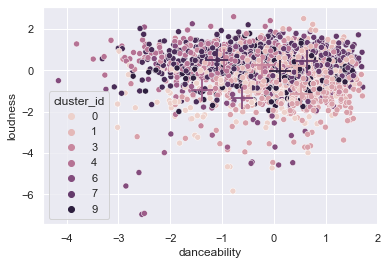

In [57]:
import seaborn as sns

sns.scatterplot(data=features_clustered_sub_df,
               x='danceability',
               y='loudness',
               hue='cluster_id')

# plot centroids
sns.scatterplot(data=cluster_center_sub_df,
               x="danceability",
               y="loudness",
               hue='cluster_id',
                legend=False,
                # marker=u'8',
                marker='+',
                s=500,
               )

In [58]:
song = np.array([[-0.35992001,  0.42882697, -0.14838292,  0.17284094,  0.16457822,
        -0.03195258, -0.1271788 , -0.20547284,  3.02816589, -0.26732747,
         0.02835173,  0.09672491,  0.07415629]])

In [59]:
kmeans.predict(song)

array([3], dtype=int32)

### Importing Billboard scraping csv

In [60]:
pwd

'/Users/edudarrelljockers'

In [61]:
hot_songs = pd.read_csv('/Users/edudarrelljockers/Desktop/Ironhack/hot100_songs.csv')

In [62]:
hot_songs

,Unnamed: 0,title,artist
0,0,Rapstar,Polo G
1,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
2,2,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
3,3,Montero (Call Me By Your Name),Lil Nas X
4,4,Levitating,Dua Lipa Featuring DaBaby
...,...,...,...
95,95,Go!,Moneybagg Yo Featuring BIG30
96,96,Drankin N Smokin,Future & Lil Uzi Vert
97,97,Monsters,All Time Low Featuring Demi Lovato & blackbear
98,98,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke


In [63]:
## Part 4
# from the input to the cluster recommendation
df_chunk = pd.DataFrame(chunk_list)
df_chunk.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.777,0.871,7,-5.588,1,0.2360,0.00998,0.0,0.3660,0.624,140.098,audio_features,48F4fY1pKOTWN1H8q99dJE,spotify:track:48F4fY1pKOTWN1H8q99dJE,https://api.spotify.com/v1/tracks/48F4fY1pKOTW...,https://api.spotify.com/v1/audio-analysis/48F4...,273973,4
1,0.789,0.881,11,-5.758,1,0.0331,0.10900,0.0,0.3550,0.647,133.299,audio_features,5MYFw4T2gy52pOGBN4EYHS,spotify:track:5MYFw4T2gy52pOGBN4EYHS,https://api.spotify.com/v1/tracks/5MYFw4T2gy52...,https://api.spotify.com/v1/audio-analysis/5MYF...,236600,4
2,0.843,0.806,4,-5.946,0,0.2690,0.14300,0.0,0.0771,0.613,94.948,audio_features,0I3q5fE6wg7LIfHGngUTnV,spotify:track:0I3q5fE6wg7LIfHGngUTnV,https://api.spotify.com/v1/tracks/0I3q5fE6wg7L...,https://api.spotify.com/v1/audio-analysis/0I3q...,270507,4
3,0.680,0.687,9,-6.162,0,0.0709,0.01610,0.0,0.2610,0.467,150.053,audio_features,1IAzD1muglOxOcPbUHs70R,spotify:track:1IAzD1muglOxOcPbUHs70R,https://api.spotify.com/v1/tracks/1IAzD1muglOx...,https://api.spotify.com/v1/audio-analysis/1IAz...,249533,4
4,0.772,0.724,6,-5.799,0,0.3070,0.01490,0.0,0.3550,0.518,84.038,audio_features,5TpaWJKnuyA4MjzAbFXSTQ,spotify:track:5TpaWJKnuyA4MjzAbFXSTQ,https://api.spotify.com/v1/tracks/5TpaWJKnuyA4...,https://api.spotify.com/v1/audio-analysis/5Tpa...,298600,4


In [64]:
df_chunk['clusters_id'] = clusters
df_chunk

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters_id
0,0.777,0.871,7,-5.588,1,0.2360,0.00998,0.000000,0.3660,0.624,140.098,audio_features,48F4fY1pKOTWN1H8q99dJE,spotify:track:48F4fY1pKOTWN1H8q99dJE,https://api.spotify.com/v1/tracks/48F4fY1pKOTW...,https://api.spotify.com/v1/audio-analysis/48F4...,273973,4,7
1,0.789,0.881,11,-5.758,1,0.0331,0.10900,0.000000,0.3550,0.647,133.299,audio_features,5MYFw4T2gy52pOGBN4EYHS,spotify:track:5MYFw4T2gy52pOGBN4EYHS,https://api.spotify.com/v1/tracks/5MYFw4T2gy52...,https://api.spotify.com/v1/audio-analysis/5MYF...,236600,4,7
2,0.843,0.806,4,-5.946,0,0.2690,0.14300,0.000000,0.0771,0.613,94.948,audio_features,0I3q5fE6wg7LIfHGngUTnV,spotify:track:0I3q5fE6wg7LIfHGngUTnV,https://api.spotify.com/v1/tracks/0I3q5fE6wg7L...,https://api.spotify.com/v1/audio-analysis/0I3q...,270507,4,1
3,0.680,0.687,9,-6.162,0,0.0709,0.01610,0.000000,0.2610,0.467,150.053,audio_features,1IAzD1muglOxOcPbUHs70R,spotify:track:1IAzD1muglOxOcPbUHs70R,https://api.spotify.com/v1/tracks/1IAzD1muglOx...,https://api.spotify.com/v1/audio-analysis/1IAz...,249533,4,1
4,0.772,0.724,6,-5.799,0,0.3070,0.01490,0.000000,0.3550,0.518,84.038,audio_features,5TpaWJKnuyA4MjzAbFXSTQ,spotify:track:5TpaWJKnuyA4MjzAbFXSTQ,https://api.spotify.com/v1/tracks/5TpaWJKnuyA4...,https://api.spotify.com/v1/audio-analysis/5Tpa...,298600,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,0.785,0.575,1,-5.628,0,0.1330,0.10500,0.000000,0.1290,0.272,81.529,audio_features,4BGOmYmRw56e8aFncJzDoD,spotify:track:4BGOmYmRw56e8aFncJzDoD,https://api.spotify.com/v1/tracks/4BGOmYmRw56e...,https://api.spotify.com/v1/audio-analysis/4BGO...,222360,4,9
2545,0.838,0.379,1,-8.451,1,0.4470,0.00189,0.000000,0.1110,0.211,164.038,audio_features,3L8iFFoNLiDLdy09txyVx8,spotify:track:3L8iFFoNLiDLdy09txyVx8,https://api.spotify.com/v1/tracks/3L8iFFoNLiDL...,https://api.spotify.com/v1/audio-analysis/3L8i...,216415,4,2
2546,0.933,0.526,8,-6.398,1,0.2440,0.00879,0.000039,0.2760,0.833,131.990,audio_features,6LcnvbHMT0qZDKZuUZaqt2,spotify:track:6LcnvbHMT0qZDKZuUZaqt2,https://api.spotify.com/v1/tracks/6LcnvbHMT0qZ...,https://api.spotify.com/v1/audio-analysis/6Lcn...,148484,4,7
2547,0.619,0.572,8,-6.531,1,0.4650,0.08260,0.000000,0.2430,0.245,116.577,audio_features,7phUrm3QFPpMkF9WGtu198,spotify:track:7phUrm3QFPpMkF9WGtu198,https://api.spotify.com/v1/tracks/7phUrm3QFPpM...,https://api.spotify.com/v1/audio-analysis/7phU...,196334,5,8


In [65]:
import random

# from song name to audio feature
def cluster_song(title):
    title = sp.search(q= title , limit = 1)
    title_id = title['tracks']['items'][0]['id']
    title_features = sp.audio_features(title_id)
    df = pd.DataFrame(title_features, index= [0])
    df_1 = df._get_numeric_data()
    df_title_scaled = scaler.transform(df_1)
    cluster_num = kmeans.predict(df_title_scaled)
    sub_df = df_chunk.loc[df_chunk['clusters_id'] == int(cluster_num)]
    sub_df.reset_index(drop=True, inplace=True) 
    title_name_id = random.choice(sub_df["id"])
    name = sp.track(title_name_id)['name']  
    return f"I recommend you: {name}"

In [66]:
# return random recomandation

title = str(input('name a title: ')).title()


if title in list(hot_songs['title']):
     print('I recommend you to listen to: ' + random.choice(hot_songs['title']))
else:
     print(cluster_title(title))

name a title: Peaches
I recommend you to listen to: Streets


In [67]:
df_chunk.to_csv('/Users/edudarrelljockers/Desktop/Ironhack/df_chunk.csv', index=False)